
# 1. Understand some defining characteristics of this data set through EDA


In [3]:
## Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
## Loading Data
file_path = './Senior DS Use Case Exercise.xlsx'
data = pd.read_excel(file_path, sheet_name='Make Model Count Data')

In [5]:
## Data Overview - head & tail
print(data.head(5))
print(data.tail(5))

  Make      Model  Count
0    -          -      4
1    -          A      1
2    -  Altrvar61      1
3    ,          ,      1
4    ?          ?     11
             Make             Model  Count
1013267  О. SMITH        ENT-50 110      1
1013268  О. SMITH        GCG-50 400      1
1013269  О. SMITH       GCRL-40 400      1
1013270     用RANE  CMPWPA221ALAEAAA      1
1013271   1013272               NaN      0


In [6]:
# understand the structure of the data
print(data.info())

# The dataset contains 1,013,272 entries (rows). This is indicated by the range index (0 to 1,013,271).
# There are a total of 3 columns in the dataset:
## The Make column has 1,011,730 non-null entries, indicating that there are 1,542 missing values in this column.
## The Model column has 1,012,884 non-null entries, indicating that there are 388 missing values in this column.
## The Count column has 1,013,272 non-null entries, which means there are no missing values in this column.
##  Memory: The dataset occupies 23.2+ MB of memory.

## Overall Summary
## Missing Data: Both the "Make" and "Model" columns have missing values, but the "Count" column is complete.
## Data Types: The data types are appropriate for the types of data they contain, with "Make" and "Model" as strings (object) and "Count" as an integer.
## Dataset Size: With over a million entries, the dataset is quite large, which may have implications for processing time and memory usage in analysis.

# summary statistics of the dataset
summary_stats = data.describe(include='all')
print("Summary Statistics:\n", summary_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013272 entries, 0 to 1013271
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Make    1011730 non-null  object
 1   Model   1012884 non-null  object
 2   Count   1013272 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 23.2+ MB
None
Summary Statistics:
            Make    Model         Count
count   1011730  1012884  1.013272e+06
unique    13295   909098           NaN
top       TRANE       Na           NaN
freq     380024      171           NaN
mean        NaN      NaN  2.106171e+00
std         NaN      NaN  8.948685e+00
min         NaN      NaN  0.000000e+00
25%         NaN      NaN  1.000000e+00
50%         NaN      NaN  1.000000e+00
75%         NaN      NaN  1.000000e+00
max         NaN      NaN  1.943000e+03


In [7]:
## Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Make     1542
Model     388
Count       0
dtype: int64


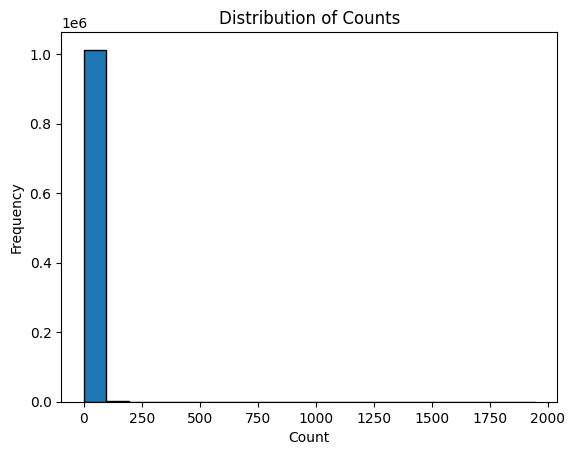

In [8]:
# Distribution of Counts

import matplotlib.pyplot as plt

plt.hist(data['Count'], bins=20, edgecolor='k')
plt.title('Distribution of Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Top Makes
top_makes = data['Make'].value_counts().head(10)
print("Top 10 Makes:\n", top_makes)

# Top Models
top_models = data['Model'].value_counts().head(10)
print("Top 10 Models:\n", top_models)


Top 10 Makes:
 Make
TRANE                    380024
OTHER                    122725
CARRIER                   80370
YORK                      38416
LENNOX                    24279
DAIKIN                    16594
RHEEM                     15861
GOODMAN                   15627
GREENHECK                 14814
INTERNATIONAL COMFORT     12539
Name: count, dtype: int64
Top 10 Models:
 Model
Na               171
N/a               65
RG250T6N          62
1                 62
MECHACS962BT      41
Unknown           41
RG240S6N          34
TBD               32
RG240T6N          30
RE350S6-1NCWW     26
Name: count, dtype: int64


## **Summary Statistics through EDA:**

The dataset contains 1,011,730 records for Make, 1,012,890 records for Model, and 1,013,272 records for Count.

There are 13,295 unique Make values and 909,098 unique Model values.

The most frequent Make is "TRANE" with 380,024 occurrences.

The most frequent Model is "Na" with 171 occurrences.

The Count column ranges from 0 to 1,943 with an average count of approximately 2.11.

**Distribution of Count Values:**

The distribution of Count values shows a high frequency of lower counts, with a long tail extending towards higher counts

**Data Quality Issues:**

The dataset contains erroneous values like -, ,, ?, and possibly others that need to be cleaned.

# 2. Characterize the types of errors we are getting in the Make values and determine the error records**

In [10]:
# Define Error Values and Patterns


import re

# List of specific error values
error_values = ['-', ',', '?', '????','0','0.00','customer','000']

# Regular expression patterns for error detection
error_patterns = [
    r'^[\W_]+$',        # Strings with only non-alphanumeric characters
    r'^\?+$',           # Strings with only question marks
    r'^\s*$',           # Empty strings
    r'^[A-Za-z]{1,2}$', # Strings with one or two letters (potential typos)
    r'^[A-Za-z]{15,}$', # Very long strings (potential typos)
    r'^0+$',            # Strings with only zeros
    r'^0+\.\d+$'        # Strings with '0.' followed by digits
]



In [11]:
# Identify Records with Error Values or Patterns


# Ensure all NA/NaN values are filled
data['Make'] = data['Make'].fillna('NA')

# Filter records with specific error values
error_records = data[data['Make'].isin(error_values)]

# Filter records matching the error patterns
for pattern in error_patterns:
    regex_error_records = data[data['Make'].str.contains(pattern, regex=True, na=False)]
    error_records = pd.concat([error_records, regex_error_records])

# Remove duplicate records if any
error_records = error_records.drop_duplicates()

# Display the records with error values or patterns
print("Records with Error Values or Patterns:\n", error_records)

Records with Error Values or Patterns:
             Make            Model  Count
0              -                -      4
1              -                A      1
2              -        Altrvar61      1
3              ,                ,      1
4              ?                ?     11
..           ...              ...    ...
41       0000000             0000      1
42       0000000         00000000      2
43     000000000         00000000      1
45   00000000000  ⁰00000000000000      1
46  000000000000       ⁰000000000      1

[5265 rows x 3 columns]


In [12]:
# Count the frequency of each specific error value
present_error_values = [val for val in error_values if val in data['Make'].values]
error_value_counts = data['Make'].value_counts().loc[present_error_values]
print("Frequency of Specific Error Values:\n", error_value_counts)

# Count the frequency of error patterns
for pattern in error_patterns:
    pattern_error_count = data['Make'].str.contains(pattern, regex=True, na=False).sum()
    print(f"Frequency of pattern '{pattern}':", pattern_error_count)



Frequency of Specific Error Values:
 Make
-       3
,       1
?       4
0       5
0.00    1
000     1
Name: count, dtype: int64
Frequency of pattern '^[\W_]+$': 25
Frequency of pattern '^\?+$': 9
Frequency of pattern '^\s*$': 0
Frequency of pattern '^[A-Za-z]{1,2}$': 4910
Frequency of pattern '^[A-Za-z]{15,}$': 322
Frequency of pattern '^0+$': 20
Frequency of pattern '^0+\.\d+$': 1


#  3.Determine how we can map erroneous Make values to correct Makes

In [14]:
import pandas as pd
import re
import Levenshtein


# List of common erroneous values and patterns
erroneous_values = ['-', ',', '?', '????', '0', '0.00', 'customer', '000']
erroneous_patterns = [
    r'^[\W_]+$', r'^\?+$', r'^\s*$', r'^[A-Za-z]{1,2}$', r'^[A-Za-z]{15,}$', r'^0+$', r'^0+\.\d+$'
]

# Function to check if a value is erroneous
def is_erroneous(value):
    value = str(value)  # Ensure the value is a string
    if value in erroneous_values:
        return True
    for pattern in erroneous_patterns:
        if re.match(pattern, value):
            return True
    return False

# Ensure all 'Make' values are strings
data['Make'] = data['Make'].astype(str)

# Filter out nonsensical rows
data_cleaned = data[~data['Make'].apply(is_erroneous)]

# Get the list of top makes to use as correct values
top_makes = data_cleaned['Make'].value_counts().head(50).index.tolist()  # Consider top 50 makes as correct values

# Function to find the closest matches using Levenshtein distance
def find_closest_match(value, possibilities):
    if not possibilities:
        return value
    closest_match = min(possibilities, key=lambda x: Levenshtein.distance(str(value), str(x)))
    return closest_match

# Create a correction mapping based on exact matches
correction_mapping = {}
for error_value in data_cleaned['Make'].unique():
    if error_value not in top_makes and not is_erroneous(error_value):
        closest_match = find_closest_match(error_value, top_makes)
        if Levenshtein.distance(error_value, closest_match) <= 1:  # Use a threshold to decide if it's close enough
            correction_mapping[error_value] = closest_match

# Apply the correction mapping
data_cleaned['Make_corrected'] = data_cleaned['Make'].replace(correction_mapping)

# Remove any rows where the 'Make_corrected' values are still nonsensical
data_cleaned = data_cleaned[~data_cleaned['Make_corrected'].apply(is_erroneous)]

# Display the cleaned data
print("Cleaned Data:\n", data_cleaned.head())

# Display the top value counts for original and corrected 'Make' values
print("Top Original 'Make' values:\n", data['Make'].value_counts().head(20))
print("Top Corrected 'Make' values:\n", data_cleaned['Make_corrected'].value_counts().head(20))


/var/folders/jf/h5v6hnmn5ws_smgb52rl5myw0000gp/T/ipykernel_25228/3743421772.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Make_corrected'] = data_cleaned['Make'].replace(correction_mapping)


Cleaned Data:
          Make            Model  Count Make_corrected
44  0⁰0000000            00000      1      0⁰0000000
47  000000009         00000090      1      000000009
48     000001           000002      1         000001
49        001             0001      1            001
50  00 IEBERT  VS070AUA1E1046C      1      00 IEBERT
Top Original 'Make' values:
 Make
TRANE                    380024
OTHER                    122725
CARRIER                   80370
YORK                      38416
LENNOX                    24279
DAIKIN                    16594
RHEEM                     15861
GOODMAN                   15627
GREENHECK                 14814
INTERNATIONAL COMFORT     12539
AAON                      11515
BRYANT                    10168
LIEBERT                    9214
MCQUAY                     7926
MITSUBISHI                 7711
HEATCRAFT                  7113
LOREN COOK                 6988
BARD                       6377
RANE                       5791
COPELAND                 

# 4. Investigate building a model to predict the Make from the Model data. How would we go about doing this?

### Data Preparation, which will be used across all models

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing 'Model' and 'Make_corrected' columns

# Prepare features and target
X = data_cleaned['Model'].fillna('missing').astype(str)  # Ensure all values are strings
y = data_cleaned['Make_corrected'].astype(str)  # Ensure all values are strings

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Function to visualize the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    conf_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Function to print evaluation metrics
def print_metrics(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_true, y_pred))




In [ ]:
## Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Create a pipeline with TfidfVectorizer and MultinomialNB
model_nb = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model_nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = model_nb.predict(X_test)
print("Naive Bayes Classification Report")
print_metrics(y_test, y_pred_nb)
plot_confusion_matrix(y_test, y_pred_nb, label_encoder.classes_)

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train the model
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classification Report")
print_metrics(y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, label_encoder.classes_)



In [ ]:

## SVM 

from sklearn.svm import SVC

# Train the model
clf_svm = SVC()
clf_svm.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = clf_svm.predict(X_test_tfidf)

# Evaluate the model
print("SVM Classification Report")
print_metrics(y_test, y_pred_svm)
plot_confusion_matrix(y_test, y_pred_svm, label_encoder.classes_)

# BERT for Make Prediction

In [14]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report

# Assuming the data is already loaded and cleaned, with 'Model' and 'Make_corrected' columns

# Prepare features and target
X = data['Model'].fillna('missing')
y = data['Make_corrected'].astype(str)  # Ensure all values are strings

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert all entries in X_train and X_test to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=64)

# Create a custom dataset class
class EquipmentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset objects
train_dataset = EquipmentDataset(train_encodings, y_train)
test_dataset = EquipmentDataset(test_encodings, y_test)

# Load the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    fp16=False  # Ensure fp16 is disabled if using CPU
)

# Create the Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Print the results
print(results)

# Predict on the test set
y_pred = trainer.predict(test_dataset).predictions.argmax(-1)

# Decode the predictions and true labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Print the classification report
print(classification_report(y_test_decoded, y_pred_decoded))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/50664 [00:00<?, ?it/s]

{'loss': 9.3929, 'grad_norm': 7.623600006103516, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 9.3048, 'grad_norm': 9.139775276184082, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.0}
{'loss': 9.2022, 'grad_norm': 10.413771629333496, 'learning_rate': 3e-06, 'epoch': 0.0}
{'loss': 9.1162, 'grad_norm': 9.446459770202637, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.0}
{'loss': 8.9732, 'grad_norm': 9.85116195678711, 'learning_rate': 5e-06, 'epoch': 0.0}
{'loss': 8.9263, 'grad_norm': 10.263567924499512, 'learning_rate': 6e-06, 'epoch': 0.0}
{'loss': 8.8266, 'grad_norm': 12.417312622070312, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.0}
{'loss': 8.5551, 'grad_norm': 11.650422096252441, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.0}
{'loss': 8.4918, 'grad_norm': 11.366101264953613, 'learning_rate': 9e-06, 'epoch': 0.0}
{'loss': 8.1049, 'grad_norm': 12.465200424194336, 'learning_rate': 1e-05, 'epoch': 0.0}
{'loss': 7.9525, 'grad_norm': 12.1645956039

KeyboardInterrupt: 

In [ ]:
# Calculate and print precision, recall, and f1-score


sccj5nt gbn   umm  jfrom sklearn.metrics import classification_report, precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_decoded, y_pred_decoded, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

### Model Selection Summary
Start Simple: Begin with simple models to set a baseline.

Experiment: Test more complex models and tune hyperparameters.

Evaluate: Use appropriate metrics to evaluate model performance.

Advanced Models: Consider using advanced models like BERT for improved performance.

Final Selection: Choose the model that balances performance, interpretability, and deployment constraints.

In [ ]:
import pickle

# Assuming Random Forest performed the best
best_model = clf_rf

# Save the trained model to a file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

# Save the label encoder to a file
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)


## 5. What other supplemental information would be useful here?

1. Metadata about the Equipment

Year of Manufacture: Knowing when the equipment was made can help identify common models for specific years.

Serial Number Patterns: Serial numbers might contain embedded information about the make or manufacturing process.

Equipment Type or Category: Categorizing the equipment into broader types (e.g., HVAC, industrial, consumer) can narrow down the possible makes.

2. Contextual Information

Geographic Location: The location where the equipment is being used can be indicative of the make, as certain brands may be more prevalent in specific regions.

Usage Data: Information about how the equipment is used can provide clues about the make. For example, industrial equipment may have different makes compared to consumer equipment.

3. Historical Data

Previous Repairs and Maintenance Records: Historical data on repairs and maintenance can help identify the make based on the frequency and type of issues.

Warranty Information: Warranty data might provide direct information about the make and model.

4. External Data Sources

Industry Databases: Access to external databases that catalog equipment models and makes can provide additional validation.


